In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns# data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Undertstanding the Data

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.drop("customerID", axis = 1, inplace = True)

In [6]:
df.tenure.mean()

32.37114865824223

In [7]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [8]:
churn_rate = df.Churn[df.Churn == "Yes"].count() / df.shape[0]
print(churn_rate)

0.2653698707936959


In [9]:
churned = df.loc[df.Churn == "Yes"]

In [10]:
churned["Contract"].value_counts() #long contracts leads to lesser churn rate

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [11]:
churned["tenure"].value_counts() #similarly over here too

1     380
2     123
3      94
4      83
5      64
     ... 
60      6
72      6
62      5
64      4
63      4
Name: tenure, Length: 72, dtype: int64

In [12]:
df.Churn.value_counts() #1 represents Churned

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
CTR = pd.crosstab(index = df.Contract, columns = df.Churn)

<Axes: ylabel='Contract'>

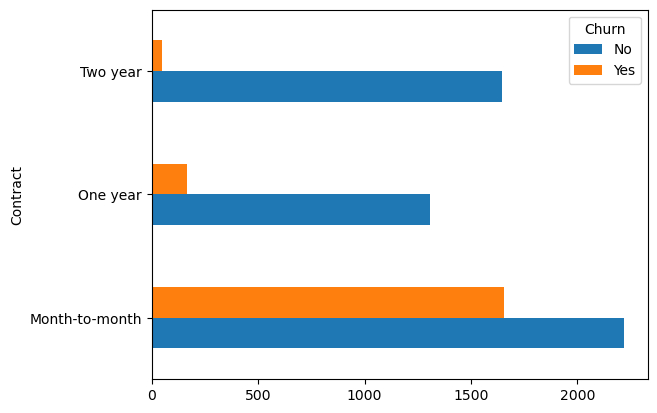

In [14]:
CTR.plot.barh()

In [15]:
CTR

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.info() #Total charges is object data type, must be some white space since not identified in previous cell

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = "coerce")

In [19]:
df.TotalCharges #dtype is float now 

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [20]:
df.isnull().sum() #now we have 11 missing values from the same column

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
mask = df.TotalCharges.isna()
missing = df[mask] #subsetting the missing rows

In [22]:
missing

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [23]:
df.iloc[753,19] #inspecting the missing values individually, white space it is

'No'

In [24]:
"""instead of using MICE or replacing it with median, logical replacement will be better.
The tenure column is assumed to be number of months. Since the tenure is 0 for all missing
values, thus 0 seems to be the most likely replacement"""

'instead of using MICE or replacing it with median, logical replacement will be better.\nThe tenure column is assumed to be number of months. Since the tenure is 0 for all missing\nvalues, thus 0 seems to be the most likely replacement'

In [25]:
df.TotalCharges.fillna(0, inplace=True)

In [26]:
df.TotalCharges.dtype

dtype('float64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [29]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [30]:
CPR = pd.crosstab(index = df.PaymentMethod, columns= df.Churn)

<Axes: ylabel='PaymentMethod'>

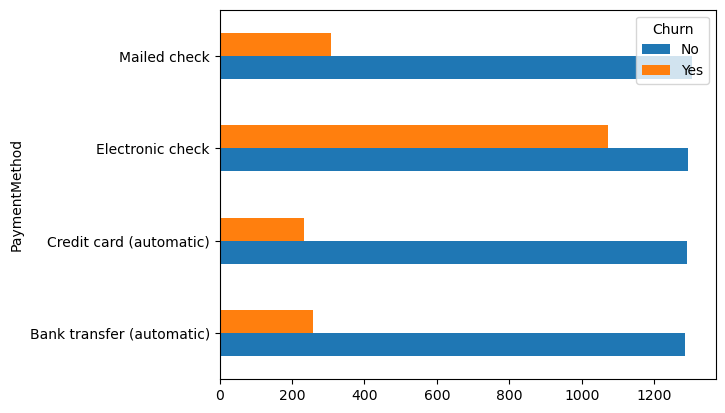

In [31]:
CPR.plot.barh()

In [32]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [33]:
numeric_cols = df.select_dtypes(["float64", "int64"])

In [34]:
numeric_cols

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


# Preprocessing and Model Selection

In [35]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [36]:
unique_counts = df.select_dtypes("O").nunique()
binary_columns = unique_counts[unique_counts == 2].index.drop("Churn").tolist()
categorical_columns = unique_counts[unique_counts > 2].index.tolist()
target_column = "Churn"

In [37]:
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_train.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5557,Female,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,80.20,384.25
2270,Female,1,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,86.85,220.95
6930,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75
2257,Female,0,No,No,60,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),80.55,4847.05
898,Female,0,No,No,12,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),98.90,1120.95


In [38]:
transformer = ColumnTransformer(
    [
        ("scaler", StandardScaler(), ["MonthlyCharges", "TotalCharges", "tenure"]),
        ("binary_encoder", preprocessing.OrdinalEncoder(), binary_columns),
        ("ohe", preprocessing.OneHotEncoder(drop="first"), categorical_columns),
    ],
    remainder="passthrough",
)

transformer.fit(X_train)
columns = transformer.get_feature_names_out()
columns = list(map(lambda x: str(x).split("__")[-1], columns))

X_train = pd.DataFrame(transformer.transform(X_train), columns=columns)
X_test = pd.DataFrame(transformer.transform(X_test), columns=columns)

In [39]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

## Support Vector Classifier

In [40]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [41]:
SVC_grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 6, cv = 3)
SVC_grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=  10.9s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.753 total time=  10.8s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=  10.6s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.806 total time=   6.2s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   5.6s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.780 total time=   6.2s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.735 total time=   6.1s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.738 total time=   6.7s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.768 total time=   6.5s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.735 total time=   4.9s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.735 total time=   5.5s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=6)

In [42]:
y_pred_SVC = SVC_grid.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred_SVC)) #rbf kernel gives the best accuracy despite being low dimensional 

0.7998106956933271


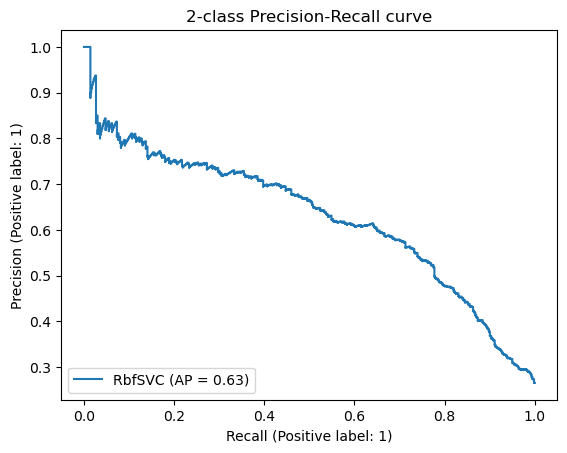

In [44]:
display = PrecisionRecallDisplay.from_estimator(
    SVC_grid, X_test, y_test, name="RbfSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve") #Average precision is better in linear than rbf

In [45]:
print(classification_report(y_test, y_pred_SVC)) #model precision and recall not good enough

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.48      0.56       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [46]:
roc_auc_score(y_test, y_pred_SVC)

0.6986850386827647

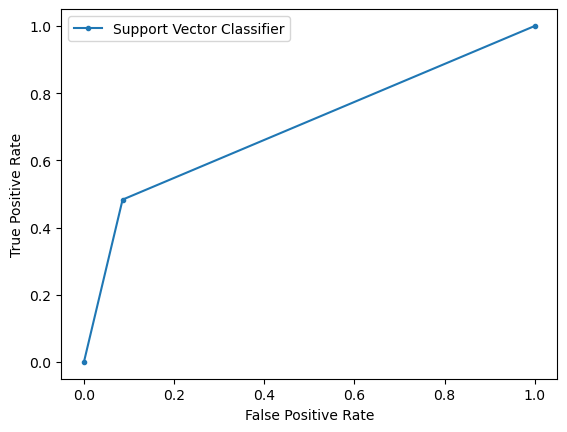

In [47]:
lr_fpr_SVC, lr_tpr_SVC, _ = roc_curve(y_test, y_pred_SVC)
# plot the roc curve for the model
plt.plot(lr_fpr_SVC, lr_tpr_SVC, marker='.', label='Support Vector Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

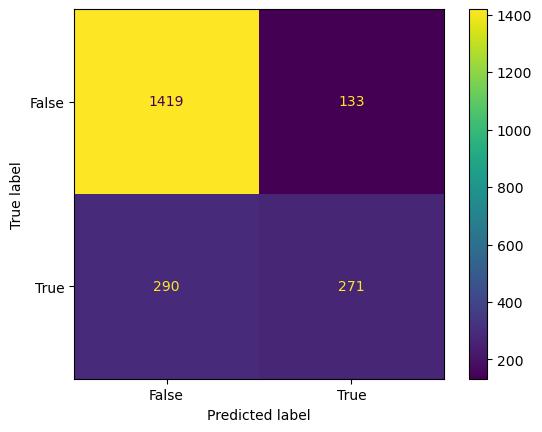

In [48]:
confusion_matrix_SVC = confusion_matrix(y_test, y_pred_SVC)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SVC, display_labels = [False, True])

cm_display.plot()
plt.show()

## Decision Tree Classifier

In [49]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [50]:
y_pred_dec = grid_search_cv.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred_dec))

0.7931850449597728


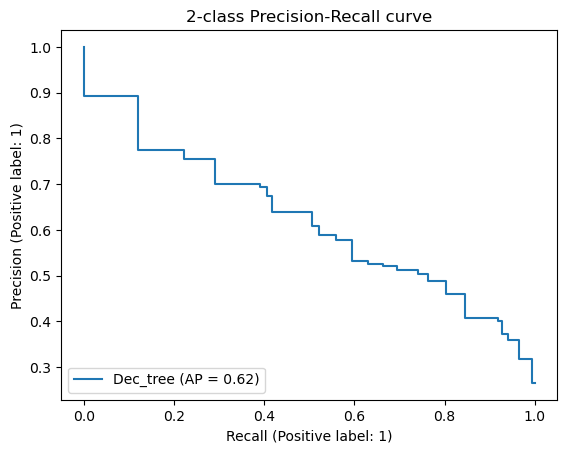

In [52]:
display = PrecisionRecallDisplay.from_estimator(
    grid_search_cv, X_test, y_test, name="Dec_tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [53]:
roc_auc_score(y_test, y_pred_dec)

0.7015730378374406

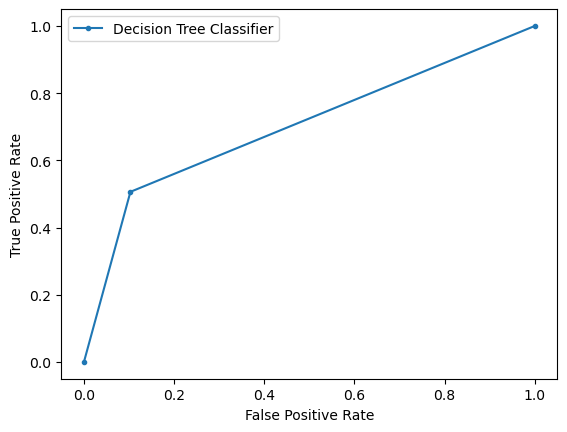

In [54]:
lr_fpr_dec, lr_tpr_dec, _ = roc_curve(y_test, y_pred_dec)
# plot the roc curve for the model
plt.plot(lr_fpr_dec, lr_tpr_dec, marker='.', label='Decision Tree Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [55]:
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



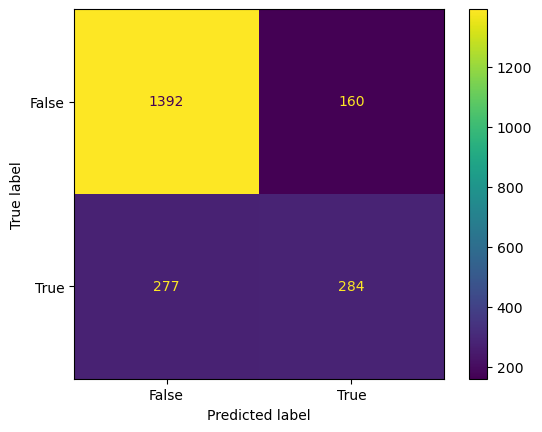

In [56]:
confusion_matrix_dec = confusion_matrix(y_test, y_pred_dec)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dec, display_labels = [False, True])

cm_display.plot()
plt.show()

## Naive Bayes Classifier

In [57]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv= 3,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'var_smoothing': 1.0}

In [58]:
y_pred_NB = gs_NB.predict(X_test)

In [59]:
print(accuracy_score(y_test, y_pred_NB))

0.7406530998580217


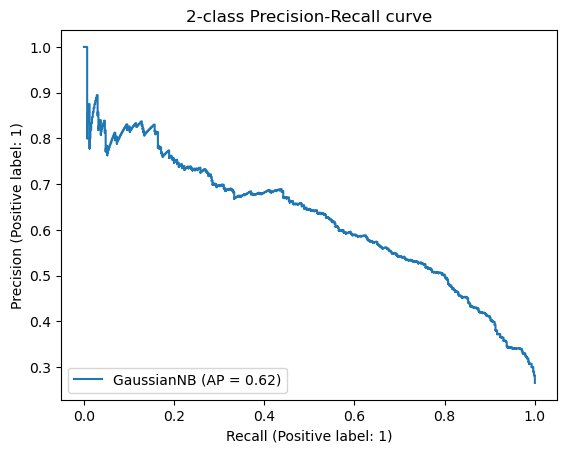

In [60]:
display = PrecisionRecallDisplay.from_estimator(
    gs_NB, X_test, y_test, name="GaussianNB"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

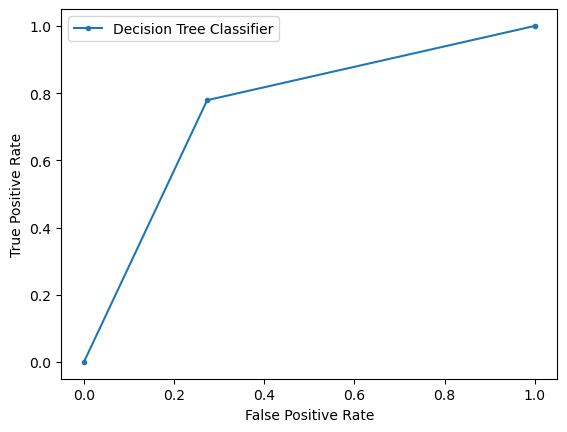

In [61]:
lr_fpr_NB, lr_tpr_NB, _ = roc_curve(y_test, y_pred_NB)
# plot the roc curve for the model
plt.plot(lr_fpr_NB, lr_tpr_NB, marker='.', label='Decision Tree Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [62]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1552
           1       0.51      0.78      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



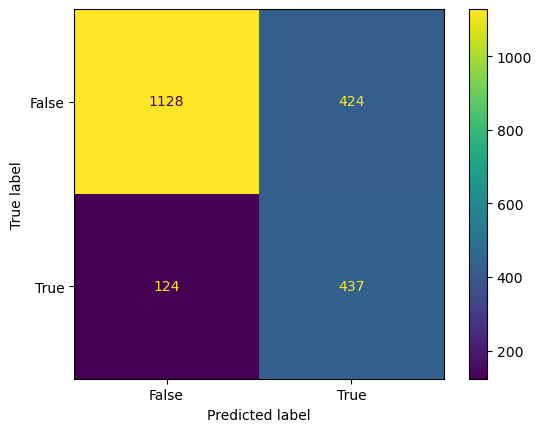

In [63]:
confusion_matrix_NB = confusion_matrix(y_test, y_pred_NB)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_NB, display_labels = [False, True])

cm_display.plot()
plt.show()

## Random Forest

In [64]:
param_grid_rfc = { 
    'n_estimators': [50, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [65]:
rfc=RandomForestClassifier(random_state=123)

In [66]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid_rfc, cv= 3)
CV_rfc.fit(X_train, y_train)

E:\Anaconda Nav\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\Anaconda Nav\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
E:\Anaconda Nav\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 150]})

In [67]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 150}

In [68]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

In [69]:
rfc1.fit(X_train, y_train)

E:\Anaconda Nav\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=200, random_state=42)

In [70]:
y_pred_rfc = rfc1.predict(X_test)

In [71]:
print(accuracy_score(y_test, y_pred_rfc))

0.8026502602934217


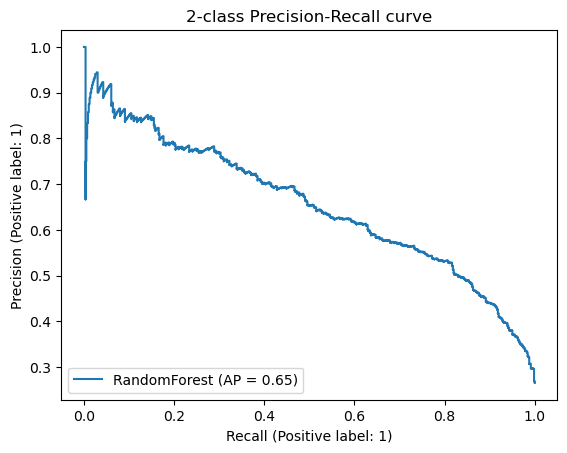

In [72]:
display = PrecisionRecallDisplay.from_estimator(
    rfc1, X_test, y_test, name="RandomForest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

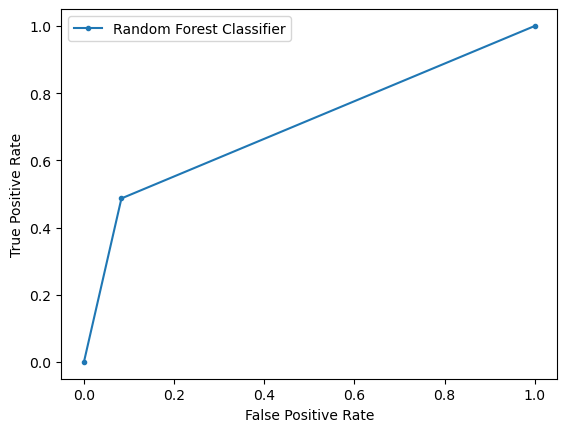

In [73]:
lr_fpr_rfc, lr_tpr_rfc, _ = roc_curve(y_test, y_pred_rfc)
# plot the roc curve for the model
plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='.', label='Random Forest Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [74]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1552
           1       0.68      0.49      0.57       561

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



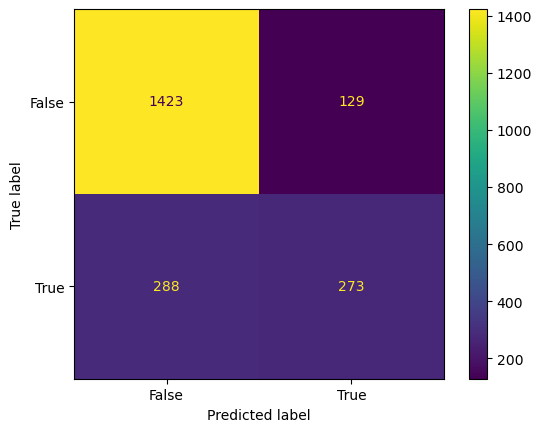

In [75]:
confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc, display_labels = [False, True])

cm_display.plot()
plt.show()

## Stochastic Gradient Classifier

In [76]:
param_dist_SGD = {
    'loss': ['hinge', 'log', 'perceptron'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet']
}

model = SGDClassifier()
randomized_search = RandomizedSearchCV(model, param_dist_SGD, n_iter=10, cv=5)
randomized_search.fit(X_train, y_train)

E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_g

RandomizedSearchCV(cv=5, estimator=SGDClassifier(),
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'loss': ['hinge', 'log', 'perceptron'],
                                        'penalty': ['l2', 'l1', 'elasticnet']})

In [77]:
randomized_search.best_params_

{'penalty': 'l1', 'loss': 'log', 'alpha': 0.001}

In [78]:
SGD1 = SGDClassifier(random_state = 42, penalty = "l2", loss = "log", alpha = 0.001)
SGD1.fit(X_train, y_train)

E:\Anaconda Nav\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(alpha=0.001, loss='log', random_state=42)

In [79]:
y_pred_SGD = SGD1.predict(X_test)

In [80]:
print(accuracy_score(y_test, y_pred_SGD))

0.7927117841930904


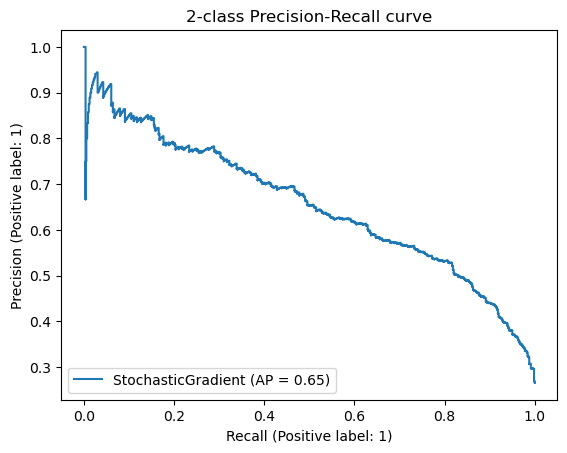

In [81]:
display = PrecisionRecallDisplay.from_estimator(
    rfc1, X_test, y_test, name="StochasticGradient"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [82]:
roc_auc_score(y_test, y_pred_SGD)

0.7393806163515076

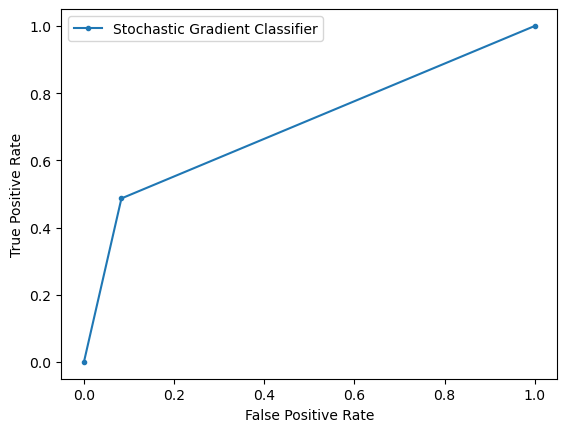

In [83]:
lr_fpr_SGD, lr_tpr_SGD, _ = roc_curve(y_test, y_pred_rfc)
# plot the roc curve for the model
plt.plot(lr_fpr_SGD, lr_tpr_SGD, marker='.', label='Stochastic Gradient Classifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [84]:
print(classification_report(y_test, y_pred_SGD))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1552
           1       0.61      0.63      0.62       561

    accuracy                           0.79      2113
   macro avg       0.73      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



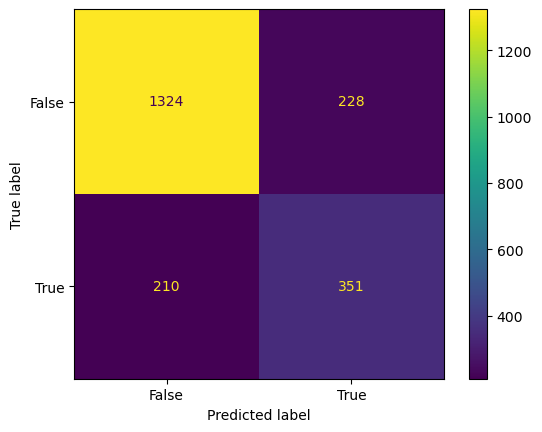

In [85]:
confusion_matrix_SGD = confusion_matrix(y_test, y_pred_SGD)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_SGD, display_labels = [False, True])

cm_display.plot()
plt.show()

# Summary

In [87]:
#calculate roc_auc score of each and save to a dataframe
roc_auc_scores = pd.DataFrame(columns=['Model','ROC_AUC'])
roc_auc_scores.loc[0] = ['svm_rbf',roc_auc_score(y_test, SVC_grid.predict(X_test))]
roc_auc_scores.loc[1] = ['tree_clf',roc_auc_score(y_test,grid_search_cv.predict(X_test))]
roc_auc_scores.loc[2] = ['randomforestclf',roc_auc_score(y_test,rfc1.predict(X_test))]
roc_auc_scores.loc[3] = ['bayes_clf',roc_auc_score(y_test,gs_NB.predict(X_test))]
roc_auc_scores.loc[4] = ['sgd_clf',roc_auc_score(y_test,SGD1.predict(X_test))]
roc_auc_scores

,Model,ROC_AUC
0,svm_rbf,0.698685
1,tree_clf,0.701573
2,randomforestclf,0.701756
3,bayes_clf,0.752885
4,sgd_clf,0.739381


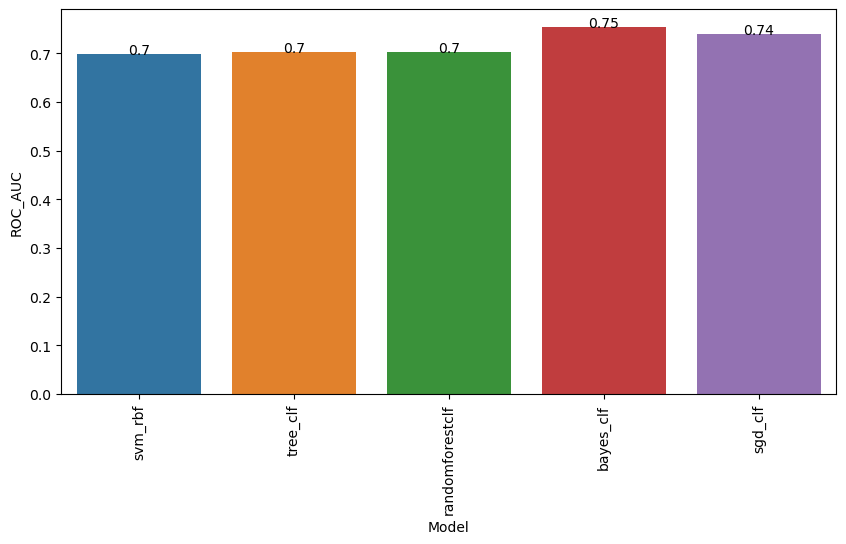

In [88]:
#make a bar chart to show the highest values of roc_auc with values also printed
plt.figure(figsize=(10,5))
sns.barplot(x='Model',y='ROC_AUC',data=roc_auc_scores)
plt.xticks(rotation=90)
for i in range(len(roc_auc_scores)):
    plt.text(i,roc_auc_scores['ROC_AUC'][i],round(roc_auc_scores['ROC_AUC'][i],2),ha='center')
plt.show()

### Thus bayes_clf is the best estimator for Churn Modelling